#퍼셉트론 혹은 노드 라고 함

아래 그림 p1을

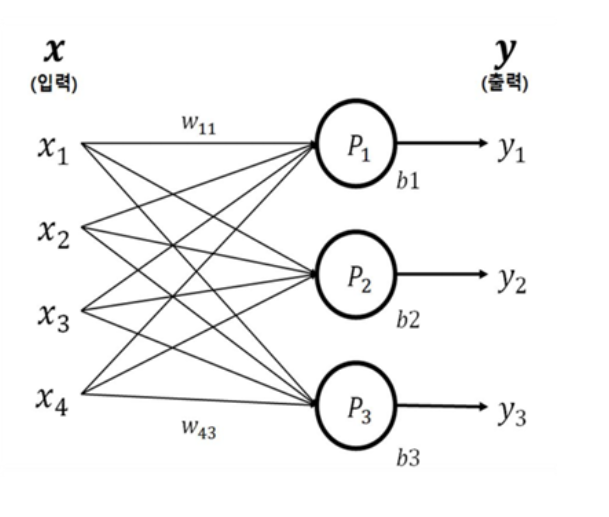

In [1]:
import numpy as np
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/코랩 드라이브 마운트 폴더/faults.csv')

FileNotFoundError: ignored

In [2]:
df.info()

NameError: ignored

In [ ]:
df_dataset = df[['X_Minimum', 'X_Maximum',
    'Steel_Plate_Thickness', 'LogOfAreas', 'Pastry', 'Z_Scratch', 'Bumps']]

print("df_dataset.shape: ", df_dataset.shape)
print(df_dataset.info())

In [ ]:
df_dataset = np.asarray(df_dataset, dtype = 'float32')

In [ ]:
df_dataset_x = df_dataset[0:1, :-3]
df_dataset_y = df_dataset[0:1, -3:]
#종속변수도 3개 가져옴

print("df_dataset_x : {} \ndf_dataset_x.shape : {}".format(df_dataset_x,df_dataset_x.shape))
print("df_dataset_y : {} \ndf_dataset_y.shape : {}".format(df_dataset_y,df_dataset_y.shape))

In [ ]:
RND_MEAN = 0
#평균

RND_STD = 1
#표준편차

#print(df_dataset_x.shape[-1])
#print(df_dataset_y.shape[-1])

input_cnt = df_dataset_x.shape[-1]
output_cnt = df_dataset_y.shape[-1]

weight = np.random.normal(RND_MEAN, RND_STD, size = [input_cnt, output_cnt])
bias = np.random.normal(RND_MEAN, RND_STD, size = [output_cnt])

print('weight.shape : ', weight.shape)
print('bias.shape', bias.shape)

In [ ]:
print("df_dataset_x\n",df_dataset_x)
print("\nweight : \n",weight)
print("\nbias : \n",bias)


#행렬곱을 위한 퍼셉트론 1,2,3 가 만들어 질 것임
#아래 나온 결과값들을 연산해서! 멧뮬 함수 써보자!

In [ ]:
P_1 = np.matmul(df_dataset_x[0], weight[:, 0]) + bias[0]
#weight에서 모든행에서 첫번째값!
P_2 = np.matmul(df_dataset_x[0], weight[:, 1]) + bias[1]
P_3 = np.matmul(df_dataset_x[0], weight[:, 2]) + bias[2]
# 각각연산해서 p1,2,3퍼셉트론을 만든거고 연산을 위해 멧뮬을 쓴 것임

In [ ]:
print(df_dataset_x[0])
print(weight[:, 0])
print(bias[0])

In [ ]:
print(P_1)
print(P_2)
print(P_3)

In [ ]:
P_total = np.matmul(df_dataset_x, weight) + bias
print(P_total)

#멧뮬을 이용해 한 번에 연산도 가능하나
#쪼개서 하나하나 확인 하는 것도 중요하기 때문에 쪼개본 것임

웨이트와 바이어스를 파라미터라고 부를 것임
파라미터는 값이 갱신 될 것임
에폭 값이 증가할 수록, 에폭값이 달라질 수록
웨이트와 바이어스의 값도 변경되는 것


고정된 값들을 #하이퍼 파라미터#
라고 부를 것임



#파라미터 - 가중치 / 편향
#hyper parameter - lr, mean, std.....

아담을 쓰면 러닝레이트는 변할 수 있지만 초기 고정되어 있는 값이 있기 때문에 일단은 하이퍼 파라미터로 사용할 것임

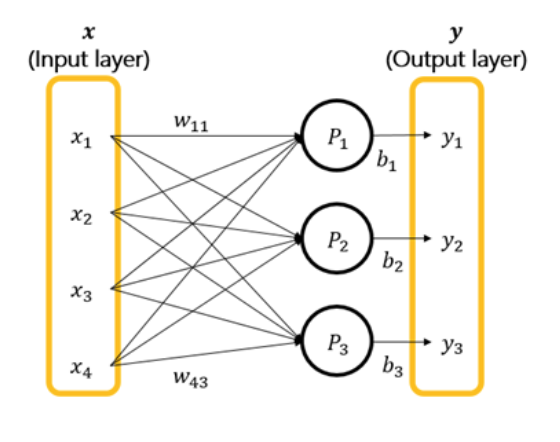

In [ ]:
#그림에서 input layer, output layer = 열을 의미함

#똑같은 미니배치를 두번 돌리면 2번의 에폭이 돌아가나
#두 에폭의 결과가 같이 나올 것이기 때문에
#똑같은 미니배치를 두번 짜는 것은 별로 좋지 않다.

In [ ]:
#학습데이터에 대한 비율을 몇으로 할거냐
#미니배치를 몇개로 나눠 진행할 거냐

1. 데이터의 특징 확인

2. 파라미터 생성 (weight, bias)

3. 학습 및 테스트 데이터 분류하기

에폭은 몇번을 설정을 할 건지
미니배치 사이즈는 몇개로 할 건지
학습데이터는 어떻게 할 건지

4.미니배치 처리

5.forward propagation

순전파를 진행

--6

back propagation

다시 돌아가는 것

경사 하강법을 통해서 업데이트

In [17]:
import pandas as pd
import numpy as np

df = pd.read_csv('/content/drive/MyDrive/database/faults_mini.csv')

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   X_Minimum              10 non-null     int64
 1   Y_Minimum              10 non-null     int64
 2   Pixels_Areas           10 non-null     int64
 3   Steel_Plate_Thickness  10 non-null     int64
 4   Pastry                 10 non-null     int64
 5   Z_Scratch              10 non-null     int64
 6   K_Scatch               10 non-null     int64
dtypes: int64(7)
memory usage: 688.0 bytes


In [19]:
df

,X_Minimum,Y_Minimum,Pixels_Areas,Steel_Plate_Thickness,Pastry,Z_Scratch,K_Scatch
0,42,270900,267,80,1,0,0
1,1084,185575,108,40,0,0,1
2,1109,1170194,130,175,0,1,0
3,190,210936,132,150,1,0,0
4,330,429227,264,150,1,0,0
5,74,779144,1506,150,1,0,0
6,51,585861,139,70,0,1,0
7,397,604478,444,70,0,1,0
8,43,366881,4048,40,0,0,1
9,48,377537,3985,40,0,0,1


In [20]:
input_cnt, output_cnt = 4, 3

#4개와 독립변수가 3개 why? 그림을 보라! 

data = np.asarray(df, dtype='float32')

print(data)
print('\n type(data) \n', type(data))

[[4.200000e+01 2.709000e+05 2.670000e+02 8.000000e+01 1.000000e+00
  0.000000e+00 0.000000e+00]
 [1.084000e+03 1.855750e+05 1.080000e+02 4.000000e+01 0.000000e+00
  0.000000e+00 1.000000e+00]
 [1.109000e+03 1.170194e+06 1.300000e+02 1.750000e+02 0.000000e+00
  1.000000e+00 0.000000e+00]
 [1.900000e+02 2.109360e+05 1.320000e+02 1.500000e+02 1.000000e+00
  0.000000e+00 0.000000e+00]
 [3.300000e+02 4.292270e+05 2.640000e+02 1.500000e+02 1.000000e+00
  0.000000e+00 0.000000e+00]
 [7.400000e+01 7.791440e+05 1.506000e+03 1.500000e+02 1.000000e+00
  0.000000e+00 0.000000e+00]
 [5.100000e+01 5.858610e+05 1.390000e+02 7.000000e+01 0.000000e+00
  1.000000e+00 0.000000e+00]
 [3.970000e+02 6.044780e+05 4.440000e+02 7.000000e+01 0.000000e+00
  1.000000e+00 0.000000e+00]
 [4.300000e+01 3.668810e+05 4.048000e+03 4.000000e+01 0.000000e+00
  0.000000e+00 1.000000e+00]
 [4.800000e+01 3.775370e+05 3.985000e+03 4.000000e+01 0.000000e+00
  0.000000e+00 1.000000e+00]]

 type(data) 
 <class 'numpy.ndarray'>


In [25]:
RND_STD  = 1
RND_MEAN = 0

weight = np.random.normal(RND_MEAN, RND_STD, size = [input_cnt, output_cnt])
bias = np.random.normal(RND_MEAN, RND_STD, size = [output_cnt])

print('weight.shape : ', weight.shape)
print('bias.shape : ', bias.shape)
print('data.shape : ', data.shape)

weight.shape :  (4, 3)
bias.shape :  (3,)
data.shape :  (10, 7)


In [26]:
mb_size = 2
#미니배치 사이즈를 한덩어리에 2개씩 들어가게
train_ratio = 0.8
#학습데이터의 비율 = 몇퍼센트의 비율로 써줄거냐
#80프로 써줄거자나? 데이터에서?

MiniBash_step_count = int(data.shape[0] * train_ratio) // mb_size

print('MiniBash_step_count : ', MiniBash_step_count)

#5개 나오는 이유;;;;;;;

test_begin_index = MiniBash_step_count * mb_size
print('test_begin_index : ', test_begin_index)

#8개가 아니라 10개가 나옴 ㅠㅠㅠ

MiniBash_step_count :  4
test_begin_index :  8


In [14]:
print(data.shape[0])
#데이터의 개수 총 10개
print(data.shape)
#10,7

NameError: ignored

In [ ]:
np.arange(10)

In [13]:
shuffle_map = np.arange(data.shape[0])
print('before shuffle_map : ', shuffle_map)

NameError: ignored

In [4]:
#인덱스를 섞어 줄거임
np.random.shuffle(shuffle_map)
print('after shuffle_map',shuffle_map)

NameError: ignored

In [ ]:
mb_data_1 = data[shuffle_map[0:2]]
mb_data_2 = data[shuffle_map[2:4]]
mb_data_3 = data[shuffle_map[4:6]]
mb_data_4 = data[shuffle_map[6:8]]

print('mb_data_1 : \n', mb_data_1)
print('mb_data_2 : \n', mb_data_2)
print('mb_data_3 : \n', mb_data_3)
print('mb_data_4 : \n', mb_data_4)

#미니배치 사이즈만큼 0:2쪼개준거임

#무작위로 섞어서 쪼개줌.

#이것을 미니배치를 처리했다고 함

In [5]:
#4개는 독립변수로 3개는 종속변수로 쪼개줄 필요가 있음

print("첫 번째 미니배치 데이터의 행과 열")
mb_1_train_x = mb_data_1[:, : -output_cnt]
#독립변수를 만들어 준거임
mb_1_train_y = mb_data_1[:, -output_cnt : ]
#종속변수만 가지고 오겠다

#슬라이싱 해주고 있는거임

print('mb_1_train_x \n',mb_1_train_x)
print('mb_1_train_y \n',mb_1_train_y)


print("두 번째 미니배치 데이터의 행과 열")
mb_2_train_x = mb_data_2[:, : -output_cnt]
mb_2_train_y = mb_data_2[:, -output_cnt : ]
print('mb_2_train_x \n',mb_2_train_x)
print('mb_2_train_y \n',mb_2_train_y)

print("세 번째 미니배치 데이터의 행과 열")
mb_3_train_x = mb_data_3[:, : -output_cnt]
mb_3_train_y = mb_data_3[:, -output_cnt : ]
print("mb_3_train_x : \n", mb_3_train_x)
print("mb_3_train_y : \n", mb_3_train_y)

print("네 번째 미니배치 데이터의 행과 열")
mb_4_train_x = mb_data_4[:, : -output_cnt]
mb_4_train_y = mb_data_4[:, -output_cnt : ]
print("mb_4_train_x : \n", mb_4_train_x)
print("mb_4_train_y : \n", mb_4_train_y)

첫 번째 미니배치 데이터의 행과 열


NameError: ignored

In [ ]:
mb_1_y_hat_1 = np.matmul(mb_1_train_x, weight[:,0]) + bias[0]

#첫번째 미니배치에 퍼셉트론을 구한 것임 p1

In [6]:
weight[:,0]
#4개~

NameError: ignored

In [ ]:
mb_1_train_x

In [7]:


print("========첫 번째 미니배치 신경망 연산 결과(p1,p2,p3)=========")
mb_1_y_hat_1 = np.matmul(mb_1_train_x, weight[:,0]) + bias[0]
mb_1_y_hat_2 = np.matmul(mb_1_train_x, weight[:,1]) + bias[1]
mb_1_y_hat_3 = np.matmul(mb_1_train_x, weight[:,2]) + bias[2]

#첫번째 미니배치에 퍼셉트론 1,2,3

print('mb_1_y_hat_1 : ', mb_1_y_hat_1)
print('mb_1_y_hat_2 : ', mb_1_y_hat_2)
print('mb_1_y_hat_3 : ', mb_1_y_hat_3)

========첫 번째 미니배치 신경망 연산 결과(p1,p2,p3)=========


NameError: ignored

In [ ]:
print("========두 번째 미니배치 신경망 연산 결과(p1,p2,p3)=========")
mb_2_y_hat_1 = np.matmul(mb_2_train_x, weight[:,0]) + bias[0]
mb_2_y_hat_2 = np.matmul(mb_2_train_x, weight[:,1]) + bias[1]
mb_2_y_hat_3 = np.matmul(mb_2_train_x, weight[:,2]) + bias[2]

#두번째 미니배치에 퍼셉트론 1,2,3

print('mb_2_y_hat_1 : ', mb_2_y_hat_1)
print('mb_2_y_hat_2 : ', mb_2_y_hat_2)
print('mb_2_y_hat_3 : ', mb_2_y_hat_3)

In [8]:
print("========세 번째 미니배치 신경망 연산 결과(p1,p2,p3)=========")
mb_3_y_hat_1 = np.matmul(mb_3_train_x, weight[:,0]) + bias[0]
mb_3_y_hat_2 = np.matmul(mb_3_train_x, weight[:,1]) + bias[1]
mb_3_y_hat_3 = np.matmul(mb_3_train_x, weight[:,2]) + bias[2]

#세번째 미니배치에 퍼셉트론 1,2,3

print('mb_3_y_hat_1 : ', mb_3_y_hat_1)
print('mb_3_y_hat_2 : ', mb_3_y_hat_2)
print('mb_3_y_hat_3 : ', mb_3_y_hat_3)

========세 번째 미니배치 신경망 연산 결과(p1,p2,p3)=========


NameError: ignored

In [9]:

print("========네 번째 미니배치 신경망 연산 결과(p1,p2,p3)=========")
mb_4_y_hat_1 = np.matmul(mb_4_train_x, weight[:,0]) + bias[0]
mb_4_y_hat_2 = np.matmul(mb_4_train_x, weight[:,1]) + bias[1]
mb_4_y_hat_3 = np.matmul(mb_4_train_x, weight[:,2]) + bias[2]

#네번째 미니배치에 퍼셉트론 1,2,3

print('mb_4_y_hat_1 : ', mb_4_y_hat_1)
print('mb_4_y_hat_2 : ', mb_4_y_hat_2)
print('mb_4_y_hat_3 : ', mb_4_y_hat_3)

========네 번째 미니배치 신경망 연산 결과(p1,p2,p3)=========


NameError: ignored

In [10]:
print(mb_1_y_hat_1, mb_1_y_hat_2, mb_1_y_hat_3)
print(mb_2_y_hat_1, mb_2_y_hat_2, mb_2_y_hat_3)
print(mb_3_y_hat_1, mb_3_y_hat_2, mb_3_y_hat_3)
print(mb_4_y_hat_1, mb_4_y_hat_2, mb_4_y_hat_3)

NameError: ignored

In [ ]:
#각각 미니배치에 대한 결과들을 하나로 합쳐줄 것임
#vstack이 해줄거임

mb_data_total = np.vstack((mb_data_1, mb_data_2, mb_data_3, mb_data_4))

print('mb_data_total.shape : ',mb_data_total.shape)

In [11]:
mb_data_total_x = mb_data_total[:, :-3]

NameError: ignored

In [ ]:
print("mb_data_total_x.shape : ", mb_data_total_x.shape)

In [12]:
display(pd.DataFrame(mb_data_total_x))

NameError: ignored

In [ ]:
mb_total_y_hat = np.matmul(mb_data_total_x, weight) + bias
print(mb_total_y_hat)


#데이터를 하나하나 다 뽑아와서
#미니배치를 하나하나 다 만들어 봤음

#아주 자세하게 뽑은거임(이것보다 자세할 수가 없음)

#가볍게 뽑을 수 있는 vstack이 있지만

#연산과정을 이해해야 하기 때문에

#세세히 뽑은것임

#오늘 배운 내용이 제일 중요한 내용